# Exploratory Data Analysis (EDA) Image Analysis 

## Emotion Face Classifier Notebook 3

Focuses on showing example expressions and aggregrate representations of emotion categories.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
import itertools

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [4]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [5]:
from utils.image_processing import (
    preprocess_images,
    generate_sample_images,
    plot_face_matrix,
    generate_composite_faces,
    run_dimensionality_reduction,
    generate_pixel_intensities
)

In [6]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [7]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,slategray
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,sienna


In [8]:
# Select training data
print(fer2013.shape)
train_df = fer2013[fer2013['usage']=='Training']
print(train_df.shape)

(35887, 9)
(28709, 9)


In [9]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
# print_json(common_dicts)

In [10]:
# Get subset of emo-color mappings
color_dict = common_dicts['plotly_styles']['Training']['color']
color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [11]:
emo_samples = generate_sample_images(train_df, n=5, cat_col='emotion', path_col='img_path')

In [12]:
color_dict

{'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [13]:
sample_imgs_save_path = os.path.join('imgs', 'comparisons', 'sample_images.png')

Plot saved to imgs/comparisons/sample_images.png


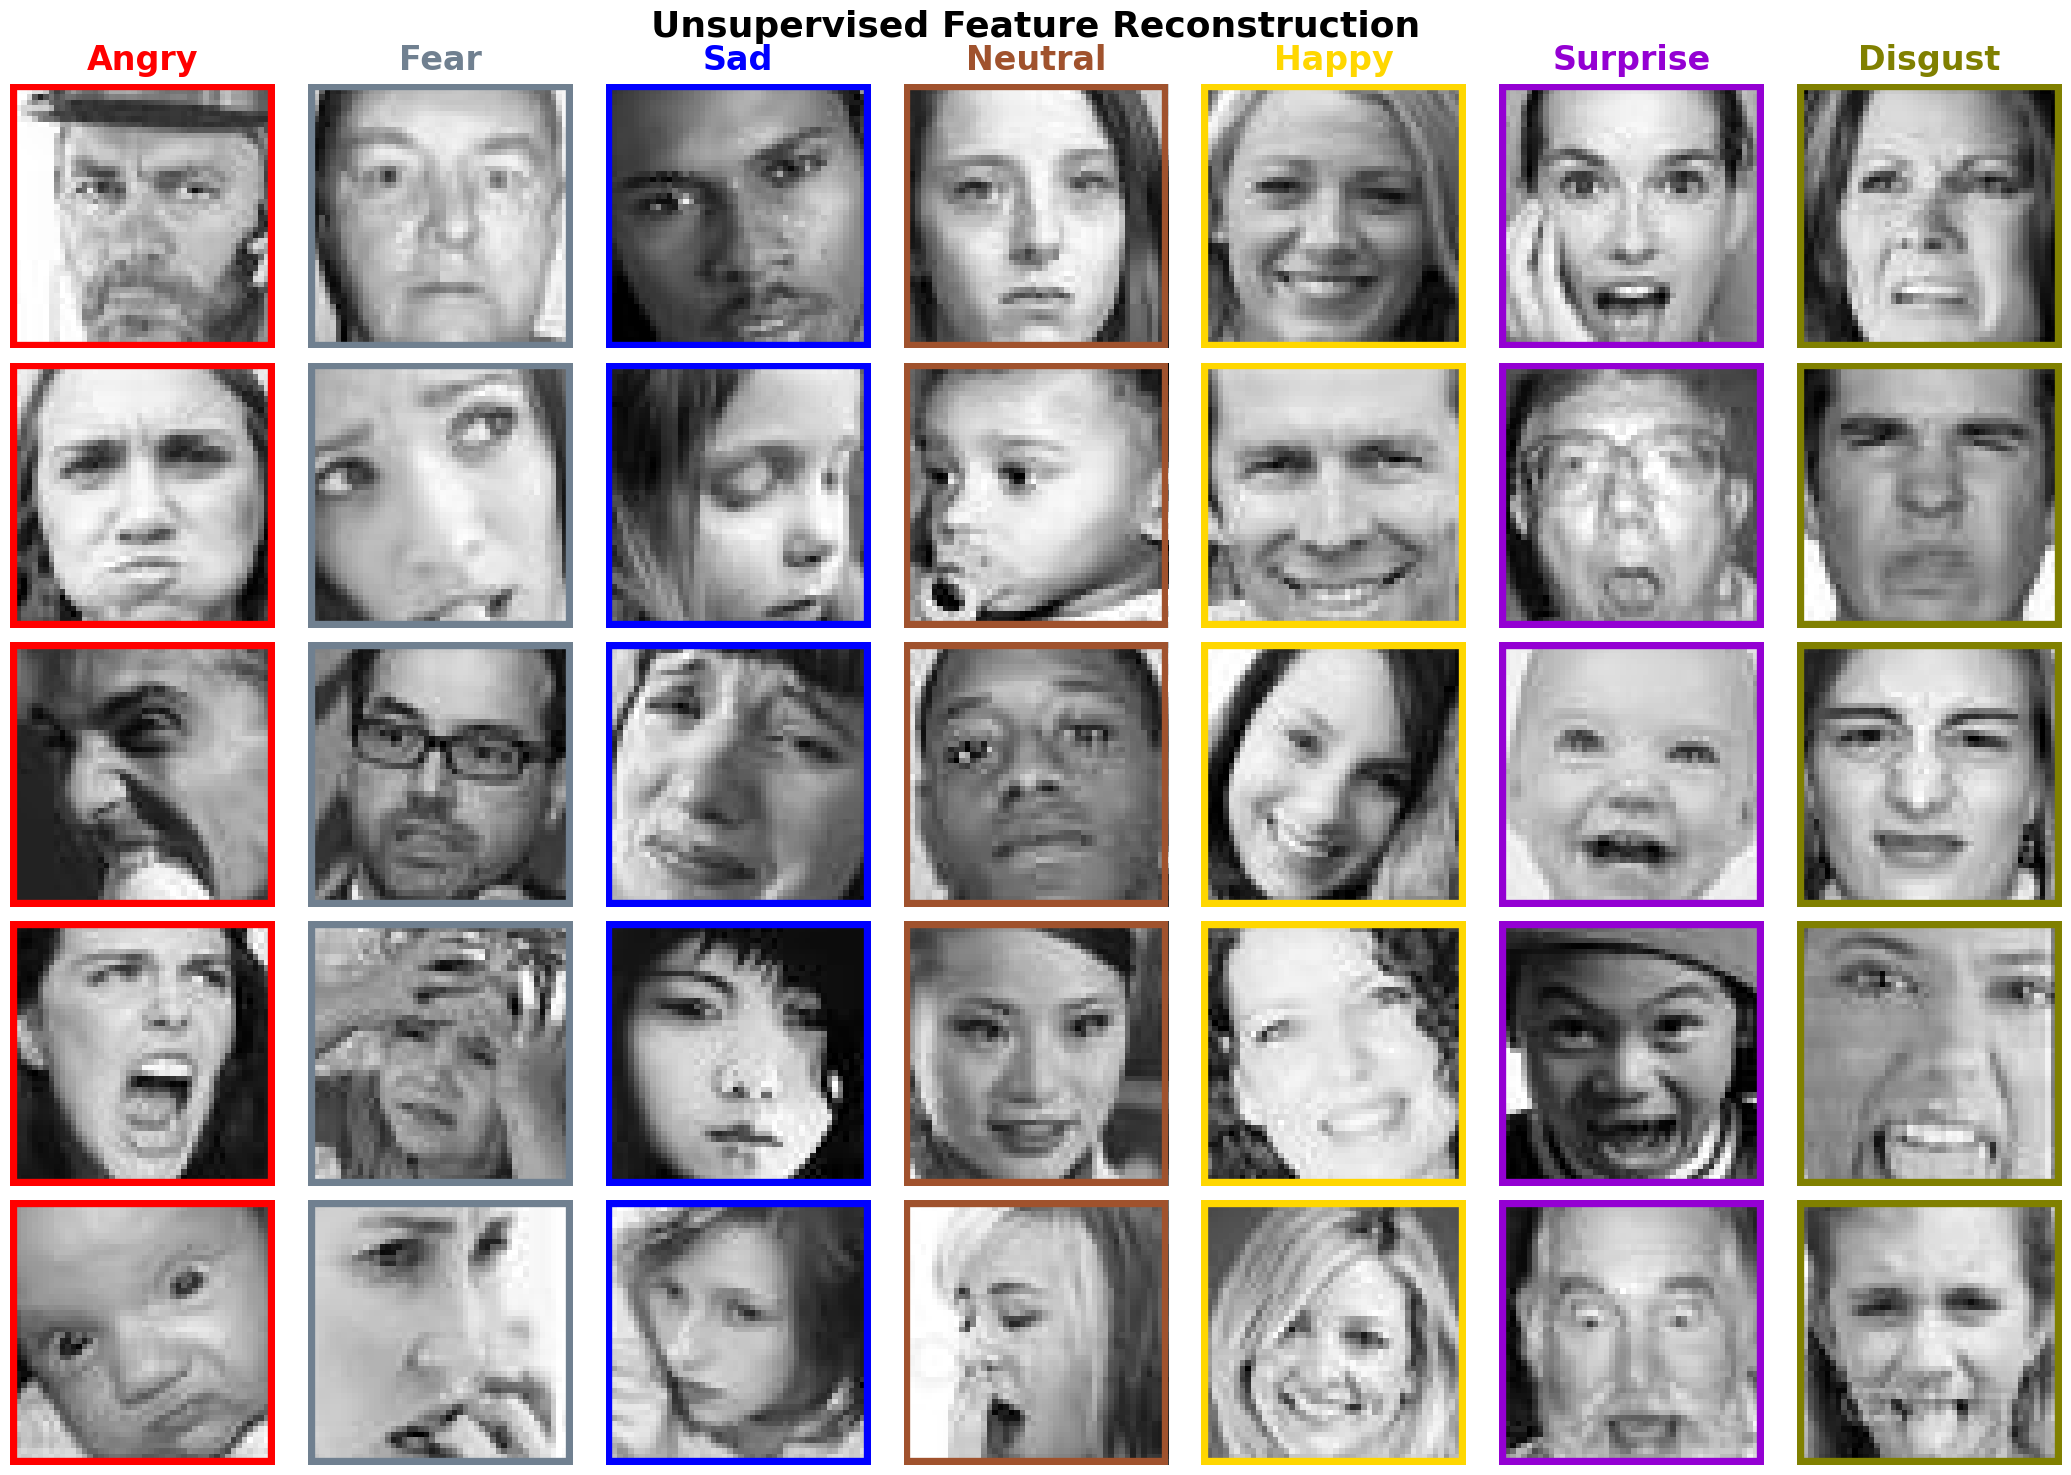

In [14]:
plot_face_matrix(
    image_dict=emo_samples, 
    row_labels=None, 
    group_colors=color_dict, 
    save_path=sample_imgs_save_path)

In [15]:
X_train, y_train = preprocess_images(fer2013, usage='Training')

In [16]:
pixel_imgs_save_path = os.path.join('imgs', 'comparisons', 'pixel_intensities.png')

Plot saved to imgs/comparisons/pixel_intensities.png


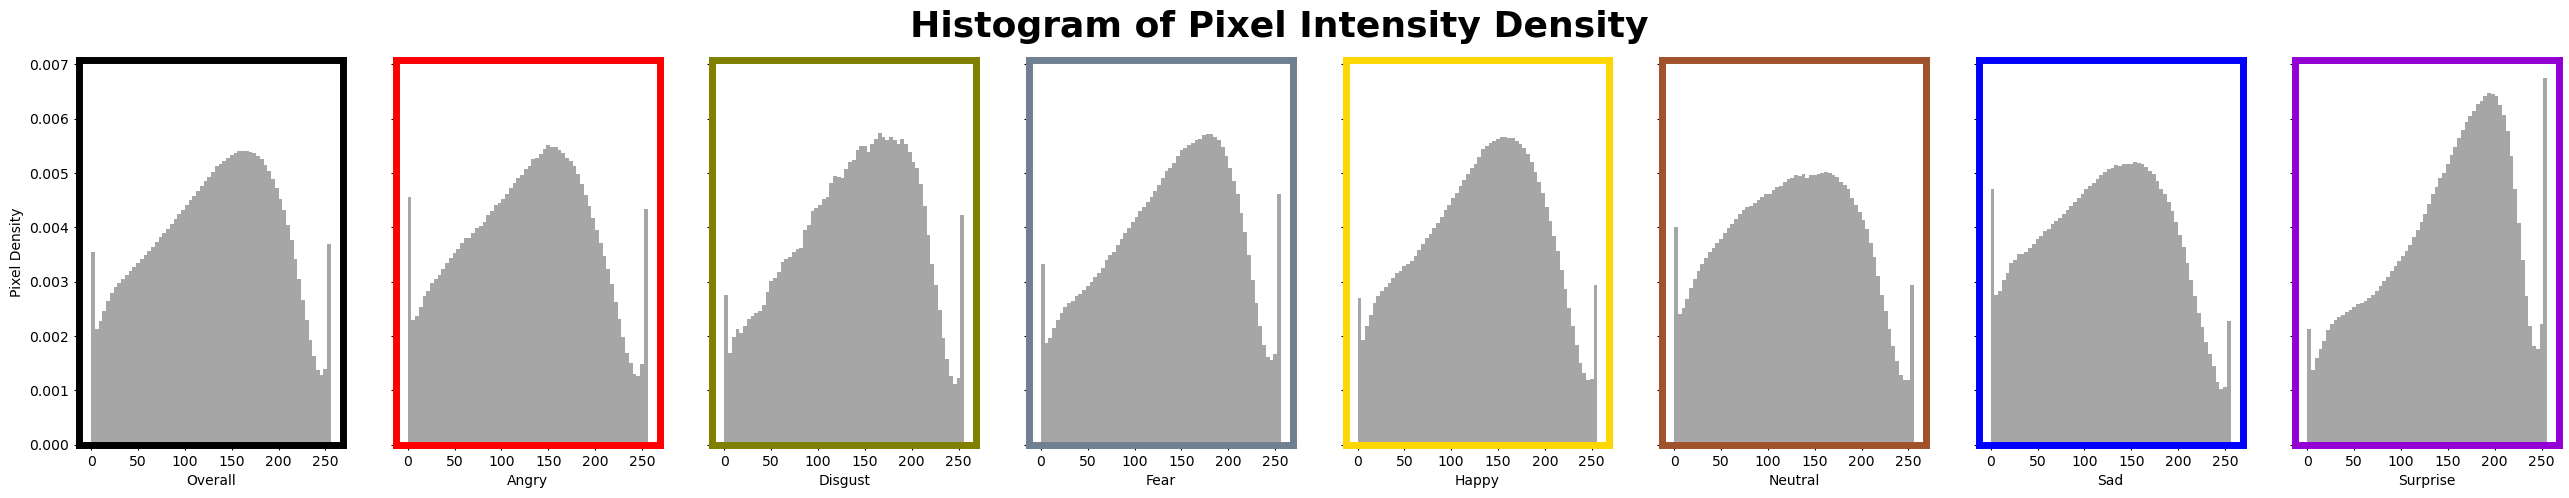

In [17]:
generate_pixel_intensities(X_train, y_train, color_dict=color_dict, save_path=pixel_imgs_save_path)

In [18]:
composite_face_dict, row_labels = generate_composite_faces(X_train, y_train, overall=True)

In [19]:
composite_imgs_save_path = os.path.join('imgs', 'comparisons', 'composite_faces.png')

In [20]:
composite_face_dict['Overall'][2].shape

IndexError: list index out of range

In [ ]:
type(composite_face_dict['Overall'][2])

In [ ]:
composite_face_dict['Overall'][2]

In [ ]:
plot_face_matrix(
    image_dict=composite_face_dict, 
    row_labels=row_labels, 
    group_colors=color_dict, 
    save_path=composite_imgs_save_path)

## Feature Extraction via Dimensionality Reducement

#### Feature Extraction Analyses

In [ ]:
methods = ['pca', 'nmf', 'ica']
norm_options = ['minmax', 'minmax', 'minmax']
max_componenets_list = [100, 50, 30]
components_list = [[1, 10, 25, 50, 75, 100], [1, 10, 20, 30, 50], [1, 5, 10, 20, 30]]

In [ ]:
# Iterate over all combinations
for method, norm, max_comp, comps_list in zip(methods, norm_options, max_componenets_list, components_list):
    results, used_components, total_components = run_dimensionality_reduction(
        X=X_train, 
        y=y_train, 
        max_components=max_comp, 
        components_list=comps_list, 
        method=method, 
        normalize=norm
    )
    dim_reduce_save_path = os.path.join('imgs', 'comparisons', f'{method}_{norm}_max_comp_{max_comp}_faces.png')
    
    # Generate a matrix plot of the results
    plot_face_matrix(
            results, 
            row_labels=used_components, 
            group_colors=color_dict,
            save_path=dim_reduce_save_path,
            method=method,
            norm=norm,
            total_components=total_components)    
    print(f"Completed: method={method}, normalization={norm}, components_list={comps_list}, max_components={max_comp}")

## Examples for Running Additional Iterations
#### Once cell with analysis lists should be used
#### Then run iteravtive cell below
#### NOTE: Analyses can be time consuming.
#### NOTE: Not all combinations are meaningful.

#### Single Analysis Example

In [ ]:
# # Define the test parameters
# method = 'nmf'  # Using NMF as the first method to test
# normalize = 'none'  # Skipping normalization
# components_list = [5, 10]  # Start with a small number of components
# max_components = 20  # Set a reasonable upper limit for components

In [ ]:
# # Run the dimensionality reduction function with the test parameters
# results, used_components, total_components = run_dimensionality_reduction(
#     X_train, y_train, max_components, components_list, method=method, normalize=normalize
# )

In [ ]:
# test_dim_reduce = os.path.join('imgs', 'comparisons', 'nmf_none_faces.png')

In [ ]:
# plot_face_matrix(
#         results, 
#         row_labels=used_components, 
#         group_colors=color_dict, 
#         save_path=test_dim_reduce,
#         total_components=total_components)

#### Multiple Analysis Pipeline

In [ ]:
# # Define parameter grids
# methods = ['pca', 'nmf', 'fa', 'ica']
# normalization_options = ['none', 'standard', 'minmax']
# max_components_list = [30, 50, 100]  # Use this list to iterate over different values
# components_lists = [[1, 5, 10, 20, 30], [1, 10, 20, 30, 50], [1, 10, 25, 50, 75, 100]]  # Match components to max_components

In [ ]:
# # Define parameter grids
# methods = ['fa']
# normalization_options = ['none', 'standard', 'minmax']
# max_components_list = [30, 50, 100]  # Use this list to iterate over different values
# components_lists = [[1, 5, 10, 20, 30], [1, 10, 20, 30, 50], [1, 10, 25, 50, 75, 100]]  # Match components to max_components

In [ ]:
# # Iterate over all combinations
# for method, norm, (components_list, max_components) in itertools.product(
#         methods, normalization_options, zip(components_lists, max_components_list)):
#         if norm == 'standard' and method == 'nmf':
#             pass
#                 # Run the dimensionality reduction analysis
#         else:
#             try:
#                 # Call the previously defined function
#                 results, used_components, total_components = run_dimensionality_reduction(
#                     X_train, y_train, max_components, components_list, method=method, normalize=norm
#                 )
#                 dim_reduce_save_path = os.path.join('imgs', 'comparisons', f'{method}_{norm}_max_comp_{max_components}_faces.png')
    
#                 # Generate a matrix plot of the results
#                 plot_face_matrix(
#                         results, 
#                         row_labels=used_components, 
#                         group_colors=color_dict, 
#                         save_path=dim_reduce_save_path,
#                         total_components=total_components)    
#                 print(f"Completed: method={method}, normalization={norm}, components_list={components_list}, max_components={max_components}")
    
#             except Exception as e:
#                 print(f"Failed: method={method}, normalization={norm}, components_list={components_list}, max_components={max_components}")
#                 print(f"Error: {e}")